# Train cycleGAN

Scripts to train cycleGAN were adopted from the [cycleGAN repository](https://github.com/eriklindernoren/PyTorch-GAN#cyclegan) that were based on the [Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks](https://arxiv.org/pdf/1703.10593.pdf) paper.

The scripts were modified to:
1. Use fully connected networks as opposed to convoultional neural networks
2. Input gene expression data as opposed to image data

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/pytorch_cyclegan/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Load arguments
data_file = f"{os.path.dirname(os.getcwd())}/data/pseudomonas/train_set_normalized.pcl"

In [3]:
# Read in data
data = pd.read_table(data_file, header=0, sep='\t', index_col=0).T
original_shape = data.shape
print(original_shape)
data.head(5)

(950, 5549)


Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.466871,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.352020,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.392405,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.398308,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.407801,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814


## Train

In [4]:
%run functions/cyclegan_transcript.py --dataset_name "pseudomonas" --n_epochs 100 --decay_epoch 50 --input_dim 5549 --hidden_dim 1000 --output_dim 100 --num_samples 1191 --batch_size 100

SyntaxError: invalid syntax (cyclegan_transcript.py, line 203)

## Plot

In [5]:
# Read in loss files
G_loss_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "data","pseudomonas","train", "G_loss.txt")

D_loss_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "data","pseudomonas","train","D_loss.txt")

G_loss_data = pd.read_csv(G_loss_file, header=None, sep=',').T
D_loss_data = pd.read_csv(D_loss_file, header=None, sep=',').T

In [6]:
G_loss_data.head(5)

,0
0,2.168067
1,2.059068
2,2.137397
3,2.114904
4,2.114356


In [7]:
D_loss_data.head(5)

,0
0,0.293328
1,0.264847
2,0.250569
3,0.252401
4,0.245855


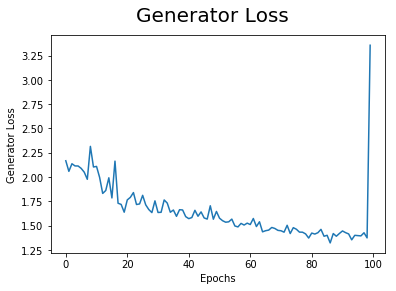

In [8]:
# Generator loss
G_loss_out_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "output","viz", "G_loss_plot.jpg")

fig = plt.figure()
plt.plot(G_loss_data.index, G_loss_data.values)
fig.suptitle('Generator Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Generator Loss')
fig.savefig(G_loss_out_file)

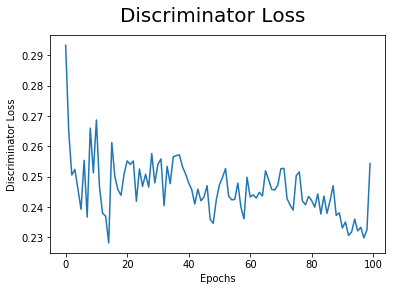

In [9]:
# Discriminator loss
D_loss_out_file = os.path.join(
    os.path.dirname(os.getcwd()),
    "output","viz","D_loss_plot.jpg")

fig = plt.figure()
plt.plot(D_loss_data.index, D_loss_data.values)
fig.suptitle('Discriminator Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Discriminator Loss')
fig.savefig(D_loss_out_file)